<a href="https://colab.research.google.com/github/pathipakapujitha/2216159_AIML_Bootcamp_2023/blob/main/Naives_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading data

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/SUV_Purchase.csv")

In [2]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.shape

(400, 5)

**Converting non-numeric to numeric values**

In [6]:
from sklearn import preprocessing

#label encoding
LE=preprocessing.LabelEncoder()

#fitting the technique to dataset
df.Gender=LE.fit_transform(df.Gender) #converting variables to numeric values
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


**Visualization**

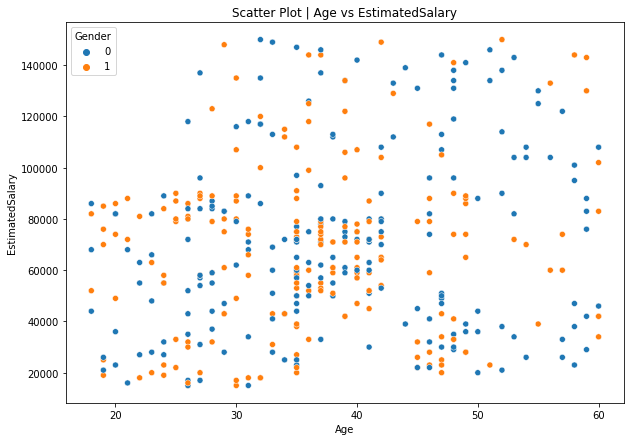

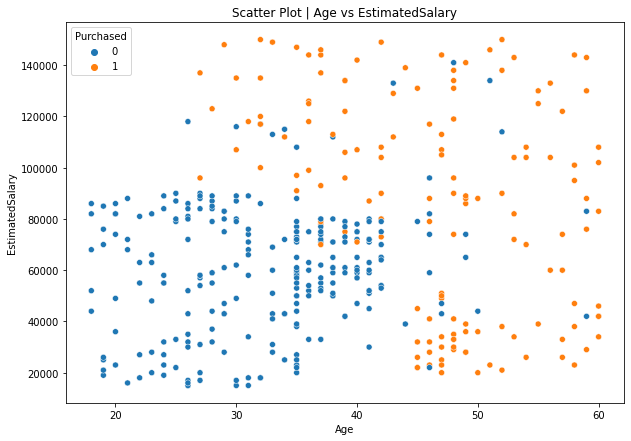

In [7]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns

def plot_vs(frame,col1,col2,hue):
  plt.figure(figsize=(10,7))
  sns.scatterplot(data=frame,x=col1,y=col2,hue=hue)
  plt.title(f"Scatter Plot | {col1} vs {col2}")

plot_vs(df,'Age','EstimatedSalary',	'Gender')
plot_vs(df,'Age','EstimatedSalary',	'Purchased')

**Feature Engineering**

In [8]:
#feature Engineering

#df.drop(['A'], axis=1)
df=df.drop(['User ID','Gender'],axis =1)#axis=1 i.e columns  ....axis =0 i.e rows
     

**Loading the data**

In [9]:
#method 1

#setting the data into input and output values
X=df.iloc[:,:-1].values #iloc==>index location 2D array
Y=df.iloc[:,-1:].values #2D array
     

In [10]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


**Splitting the data**

In [11]:
#Training and Testing the dataset
#more data-Trainig; Less data-Testing datai.e Test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
     

In [12]:
#Normalizing the data-Standard Scalar
from sklearn.preprocessing  import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)
X_test=sst.transform(X_test)
     

**Build the model**

In [13]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

**Training the data**

In [14]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

**Testing data**

In [15]:
y_pred=model.predict(X_test)

In [16]:
model.score(sst.transform(X),Y) 

0.89

In [17]:
model.score(X_train,Y_train)

0.884375

In [18]:
model.score(X_test,Y_test)

0.9125